In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = "Arial"

msa_depth_file_path = "~/database/msa/msa_depth/"

In [2]:
eukaryotes = ["worm", "human", "zebrafish", "yeast"]
prokaryotes = ["sacs2", "ecoli", "halsa", "bacsu"]


eu_nf = []
for s in eukaryotes:
    df = pd.read_table(f"{msa_depth_file_path}/{s}_neff.tsv")
    eu_nf.extend(list(df['nf']))
    
pr_nf = []
for s in prokaryotes:
    df = pd.read_table(f"{msa_depth_file_path}/{s}_neff.tsv")
    pr_nf.extend(list(df['nf']))

In [3]:
cutoff = 1000

np.where(np.array(pr_nf) > cutoff)[0].shape[0] / len(pr_nf)
np.where(np.array(eu_nf) > cutoff)[0].shape[0] / len(eu_nf)

pr_nf = np.array(pr_nf)
pr_nf = np.where(pr_nf > cutoff, cutoff, pr_nf)

eu_nf = np.array(eu_nf)
eu_nf = np.where(eu_nf > cutoff, cutoff, eu_nf)

0.10822826324611909

2.8050490883590464e-05

[Text(0, 0.0, '0.0'),
 Text(0, 0.005, '0.5'),
 Text(0, 0.01, '1.0'),
 Text(0, 0.015, '1.5'),
 Text(0, 0.02, '2.0')]

Text(0, 0.5, 'Percentage (%)')

Text(0.5, 0, 'Nf value')

(array([1.70259467e-02, 6.66129032e-03, 4.27980365e-03, 3.03856942e-03,
        2.20897616e-03, 1.98877980e-03, 1.68863955e-03, 1.43267882e-03,
        1.39410940e-03, 1.43338008e-03, 1.35413745e-03, 1.14375877e-03,
        1.01542777e-03, 8.35904628e-04, 7.23001403e-04, 6.02384292e-04,
        5.74333801e-04, 4.38990182e-04, 4.15848527e-04, 3.59747546e-04,
        2.78401122e-04, 2.38429173e-04, 1.68302945e-04, 1.38849930e-04,
        1.02384292e-04, 7.15287518e-05, 5.53997195e-05, 7.50350631e-05,
        5.53997195e-05, 3.57643759e-05, 3.99719495e-05, 2.45441795e-05,
        2.17391304e-05, 2.66479663e-05, 1.19214586e-05, 9.11640954e-06,
        1.05189341e-05, 7.01262272e-06, 3.50631136e-06, 1.40252454e-06,
        2.80504909e-06, 0.00000000e+00, 7.01262272e-07, 7.01262272e-07,
        0.00000000e+00, 7.01262272e-07, 1.40252454e-06, 0.00000000e+00,
        0.00000000e+00, 2.10378682e-06]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  

(array([1.81619415e-02, 3.64769332e-03, 2.75854530e-03, 2.21922600e-03,
        1.94592231e-03, 1.67990671e-03, 1.49770425e-03, 1.35194228e-03,
        1.12236717e-03, 1.06041834e-03, 8.74571824e-04, 6.66861016e-04,
        6.08556228e-04, 4.70082356e-04, 4.37285912e-04, 3.71693025e-04,
        3.13388237e-04, 3.31608483e-04, 3.82625173e-04, 3.89913272e-04,
        2.47795350e-04, 3.13388237e-04, 1.85846513e-04, 1.42117921e-04,
        1.71270316e-04, 1.34829823e-04, 2.11354858e-04, 2.22287005e-04,
        1.82202463e-04, 1.60338168e-04, 1.67626266e-04, 1.85846513e-04,
        1.63982217e-04, 1.53050069e-04, 1.16609577e-04, 1.56694119e-04,
        1.67626266e-04, 2.25931055e-04, 1.67626266e-04, 9.47452810e-05,
        8.01690839e-05, 2.91523941e-05, 6.92369361e-05, 5.46607390e-05,
        2.91523941e-05, 6.55928868e-05, 7.28809854e-05, 8.38131332e-05,
        9.83893302e-05, 5.55353108e-03]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  

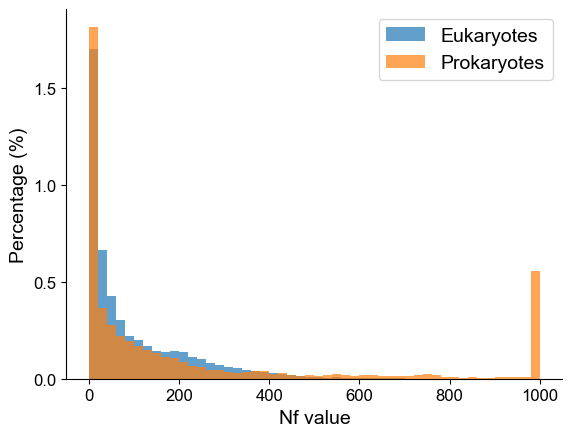

In [4]:
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for t in ax.get_yticklabels():
    t.set_fontsize(12)
for t in ax.get_xticklabels():
    t.set_fontsize(12)

ax.set_yticks(np.arange(0, 0.025, 0.005))
ax.set_yticklabels([f"{x * 100}" for x in plt.gca().get_yticks()])

plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("Nf value", fontsize=14)

plt.hist(eu_nf, range=(0, cutoff), density=True, bins=50, alpha=0.7)
plt.hist(pr_nf, range=(0, cutoff), density=True, bins=50, alpha=0.7)

plt.legend(labels=['Eukaryotes',
                   'Prokaryotes'],
           fontsize=14,
           loc='upper right',
           bbox_to_anchor=(1,1))

plt.savefig("./fig/distribution_msa_depth.pdf", bbox_inches="tight")

In [4]:
def calc_percent_with_cutoff(
    data: np.ndarray,
    cutoff: int
):
    return np.where(data > cutoff)[0].shape[0] / len(data)

In [5]:
df = pd.DataFrame()
df['cutoff'] = [2 ** i for i in range(3, 10)]

df['eu_per'] = df['cutoff'].map(lambda x: calc_percent_with_cutoff(eu_nf, x)) 
df['pr_per'] = df['cutoff'].map(lambda x: calc_percent_with_cutoff(pr_nf, x)) 

Text(0, 0.5, 'Percentage')

Text(0.5, 0, 'Nf value cutoff')

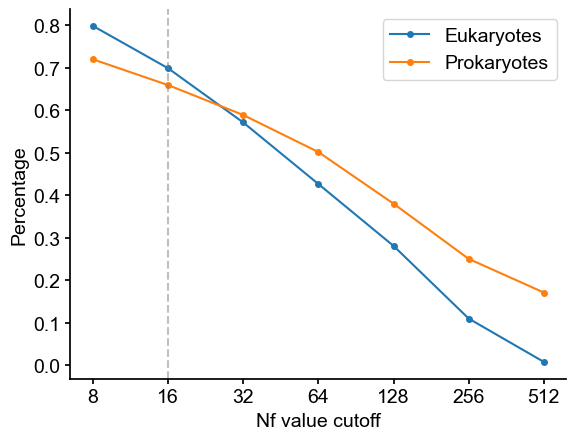

In [10]:
plt.style.use(f"{PROJECT_DIR}/asset/metalnet.mplstyle")

plt.plot(df['cutoff'], df['eu_per'], markersize=4, marker='o')
plt.plot(df['cutoff'], df['pr_per'], markersize=4, marker='o')

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xscale('log', base=2)
ax.set_xticks(df['cutoff'], [str(i) for i in df['cutoff']])
ax.axvline(x=16, color='grey', linestyle='--', linewidth=1.5, alpha=0.5)

plt.ylabel("Percentage")
plt.xlabel("Nf value cutoff")

plt.legend(labels=['Eukaryotes',
                   'Prokaryotes'],
           loc='upper right',
           bbox_to_anchor=(1,1))

plt.savefig("./fig/percent_msa_depth_cutoff.pdf", bbox_inches="tight", transparent=True)